In [1]:
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")
from tqdm.auto import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# define data path
with open('data_path.txt') as f:
    lines = f.read().splitlines()
data_path = lines[0]

# load key data
f = open(data_path+'clean_data.pckl', 'rb')
mcdata, keydata, ids, returns, EU_4F, US_4F = pickle.load(f)
f.close()

# load betas
f = open(data_path+'betas.pckl', 'rb')
betas_onlyMkt, betas_4FBMG, betas_4F, betas_onlyBMG,betas_onlyBMG2, all_sample, bmg_sample = pickle.load(f)
f.close()

# load cross section data
f = open(data_path+'cross_section.pckl', 'rb')
cs_dict, lambdas_BMG,lambdas_BMG2, lambdas_co2 = pickle.load(f)
f.close()

# data dates
mc_date = pd.Timestamp("2021-09-30")
key_date = pd.Timestamp("2020-12-31")

# load bmg data
f = open(data_path+'bmg.pckl', 'rb')
bmg_factors_value, bmg_factors_equal, valid_dict = pickle.load(f)
f.close()


# Save Data for use in other files
f = open(data_path+'results.pckl', 'rb')
country_stats, sector_stats = pickle.load(f)
f.close()

In [7]:
# get country codes
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# rename: Serbia, USA, Bosnia, 
country_stats = country_stats.reset_index()
country_stats["Country"] = np.where(country_stats["Country"] == "USA","United States",country_stats["Country"])
country_stats["Country"] = np.where(country_stats["Country"] == "Republic of Serbia","Serbia",country_stats["Country"])
country_stats["Country"] = np.where(country_stats["Country"] == "Bosnia","Bosnia and Herzegovina",country_stats["Country"])

# exclude countries with less than 5 stocks in sample
country_stats = country_stats.drop(country_stats[country_stats.Num_Firms < 5].index)
country_stats = country_stats.reset_index(drop=True)

country_stats = country_stats.merge(df,how="left",left_on="Country",right_on="COUNTRY")

In [8]:
import plotly.express as px

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 1200,
    'width': 1900,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [24]:
country_stats

,Country,Average_Beta,Weighted_Average_Beta,Market_Cap,Num_Firms,Average_CO2,Average_CO2_Score,CO2counter,COUNTRY,GDP (BILLIONS),CODE
0,United States,0.190234,-0.128342,3.254003e+07,651,3.575757e+06,413.331795,573,United States,17420.00,USA
1,Germany,-0.286073,-0.315596,1.674774e+06,96,4.028748e+06,203.828943,85,Germany,3820.00,DEU
2,United Kingdom,0.079396,0.255046,2.614242e+06,268,1.170246e+06,186.532865,264,United Kingdom,2848.00,GBR
3,Sweden,-0.114800,-0.135880,5.826228e+05,93,2.267815e+05,64.075205,91,Sweden,559.10,SWE
4,Poland,0.007964,0.109961,4.494793e+04,18,8.715927e+06,1869.556751,17,Poland,552.20,POL
5,France,-0.253234,-0.316258,2.483916e+06,102,2.580493e+06,194.630768,100,France,2902.00,FRA
6,Italy,-0.291277,-0.060441,4.577977e+05,60,2.428985e+06,315.711641,60,Italy,2129.00,ITA
7,Russia,0.351849,0.505652,6.309724e+05,29,2.082991e+07,2993.369513,27,Russia,2057.00,RUS
8,Turkey,0.069917,0.001781,5.617683e+04,30,1.834112e+06,1519.777427,28,Turkey,813.30,TUR
9,Switzerland,-0.034021,-0.167600,1.722407e+06,63,2.913581e+06,774.841279,58,Switzerland,679.00,CHE


In [23]:


fig = go.Figure(data=go.Choropleth(
    locations = country_stats['CODE'],
    z = country_stats['Weighted_Average_Beta'],
    text = country_stats['COUNTRY'],
    #colorscale = c,
    colorscale=["rgb(133,87,35)","rgb(242, 238, 237)", "rgb(131, 207, 23)"],
    #color_continuous_midpoint=0,
    zmid = 0,
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    #showscale=False,
    marker_line_width=0.8,
    colorbar_tickprefix = ''
    #colorbar_title = 'Weighted Carbon Beta'
))

fig.update_layout(
    #title_text='Weighted Average Carbon Beta per Country',
    width=950, height=600,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
    
    #.annotations = [dict(
    #    x=0.55,
    #    y=0.1,
    #    xref='paper',
    #    yref='paper',
    #    text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
    #        CIA World Factbook</a>',
    #    showarrow = False)]
)

#fig.savefig('test.png',dpi = 400,bbox_inches='tight')

fig.show(config=config)

In [10]:
sector_df = pd.DataFrame()
for sector in sector_stats.keys():
    weighted_betas = sector_stats[sector]["Weighted_Beta"]/np.sum(sector_stats[sector]["Market_Cap"])
    betas = sector_stats[sector]["Beta"]
    median_betas = np.median(betas)
    mean_betas = np.mean(betas)
    median_wbetas = np.median(weighted_betas)
    mean_wbetas = np.mean(betas)
    n = len(betas)
    
    temp_df = pd.DataFrame({
    "Beta":betas,
    "Weighted_Beta":weighted_betas,
    "Num":n,
    "Mean_Beta":mean_betas,
    "Median_Beta":median_betas,
    "Median_wBeta":median_wbetas,
    "Mean_wBeta":mean_wbetas})
    
    temp_df["Sector"] = sector
    sector_df = sector_df.append(temp_df)
    
# drop sectors with less than 10 firms
sector_df = sector_df.drop(sector_df[sector_df.Num < 10].index)
sector_df = sector_df.reset_index(drop=True)


In [22]:
sector_df[sector_df.Sector == "Consumer Cyclicals"]

,Beta,Weighted_Beta,Num,Mean_Beta,Median_Beta,Median_wBeta,Mean_wBeta,Sector
0,0.128505,0.000004,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals
1,-0.071960,-0.000025,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals
2,-0.518279,-0.000116,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals
3,-1.040108,-0.001404,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals
4,-0.243122,-0.000020,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals
...,...,...,...,...,...,...,...,...
298,-0.416236,-0.001395,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals
299,0.324328,0.000194,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals
300,-0.453286,-0.000854,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals
301,-0.288993,-0.000451,305,-0.308631,-0.349787,-0.000107,-0.308631,Consumer Cyclicals


In [11]:
co2_df = pd.DataFrame()
for sector in sector_stats.keys():
    co2 = sector_stats[sector]["CO2"]
    co2score = sector_stats[sector]["CO2_Score"]
    
    temp_df = pd.DataFrame({
    "CO2":co2,
    "CO2_Score":co2score})
    
    temp_df["Sector"] = sector
    co2_df = sector_df.append(temp_df)
    
co2_df = sector_df.reset_index(drop=True)

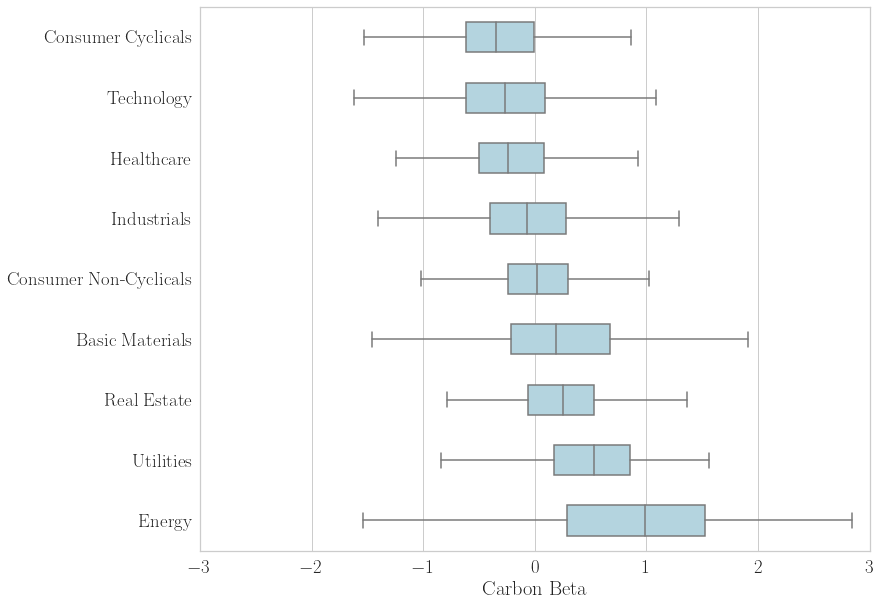

In [14]:
# Get sort by Median
from matplotlib import rc
import matplotlib as mpl
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
means_df = sector_df.drop_duplicates(subset=['Median_Beta'])
means_df = means_df.sort_values(by ='Median_Beta')
sector_sort = list(means_df["Sector"])

plt.rcParams['figure.figsize'] = [12, 10]

sns.set_theme(style="whitegrid",font_scale = 1.7,font="Times New Roman")
ax = sns.boxplot(x="Beta", y="Sector", orient='h', data=sector_df,color="lightblue",width = 0.5,order=sector_sort, showfliers = False, flierprops = dict(markerfacecolor = '0.50', markersize = 1.5))
ax.set(xlim=(-3, 3))
ax.set(ylabel=None)
ax.set(xlabel="Carbon Beta")

plt.savefig('sectorbox.png',dpi = 400,bbox_inches='tight')

#plt.show()

